In [1]:
#pip install --upgrade kneed

In [2]:
from PIL import Image, ImageDraw,ImageFont, ImageOps
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator, DataGenerator


In [3]:
floorplan = Image.open('floorplan.png')
w, h = floorplan.size #original floor plan size
print(w,h)

892 583


In [4]:
point, pointLabel = [], []
for n in range(20):
    point.append([random.randint(0, w), random.randint(0, h)])
    pointLabel.append('1.' + str(n+1))
    
# point.append([100, 100])
# pointLabel.append('1.1')
# point.append([120, 100])
# pointLabel.append('1.2')

# point.append([300, 300])
# pointLabel.append('1.3')
# point.append([320, 300])
# pointLabel.append('1.4')

# point.append([100, 400])
# pointLabel.append('1.5')
# point.append([100, 500])
# pointLabel.append('1.6')
# point.append([100, 550])
# pointLabel.append('1.7')
# point.append([100, 540])
# pointLabel.append('1.8')

# point.append([500, 540])
# pointLabel.append('1.9')



In [5]:
pointList = pd.DataFrame(point, columns=['x','y'])
pointList['label'] = pointLabel
pointList

,x,y,label
0,335,343,1.1
1,860,269,1.2
2,888,195,1.3
3,247,544,1.4
4,652,109,1.5
5,782,121,1.6
6,506,36,1.7
7,666,498,1.8
8,4,552,1.9
9,28,515,1.10


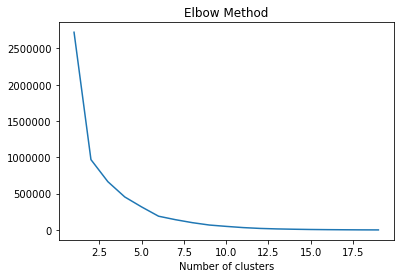

4


In [6]:
slope_x, slope_y, slope = [], [], []

for i in range(1, len(point)):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(point)
    slope_y.append(kmeans.inertia_)
    slope_x.append(i)
plt.plot(slope_x, slope_y)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.show()


k = KneeLocator(slope_x, slope_y, curve='convex', direction='decreasing').knee


#k = kn.knee
# k=0
# for n in range(len(slope_y)-1):
#     slope.append((slope_y[n+1]-slope_y[n])/(slope_x[n+1]-slope_x[n]))
    

# print(slope)
# for n in range(1, len(slope)):
#     if(slope[n]>k):
#         #print(slope[n],k)
#         k = slope[n]
        
#     else:
#         #print(n)
#         k = n
#         break
        
print(k)    


In [7]:
colorList = []
for i in range(k):
    r = random.randint(0, 255)
    b = random.randint(0, 255)
    g = random.randint(0, 255)
    color = (r, g, b)
    colorList.append(color)
colorList

[(56, 155, 231), (231, 86, 30), (68, 97, 147), (236, 24, 141)]

In [8]:
km =  KMeans(n_clusters = k)
km.fit(point)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:

pointList['kmeans'] = km.labels_
pointList

,x,y,label,kmeans
0,335,343,1.1,0
1,860,269,1.2,3
2,888,195,1.3,3
3,247,544,1.4,0
4,652,109,1.5,1
5,782,121,1.6,1
6,506,36,1.7,1
7,666,498,1.8,3
8,4,552,1.9,0
9,28,515,1.10,0


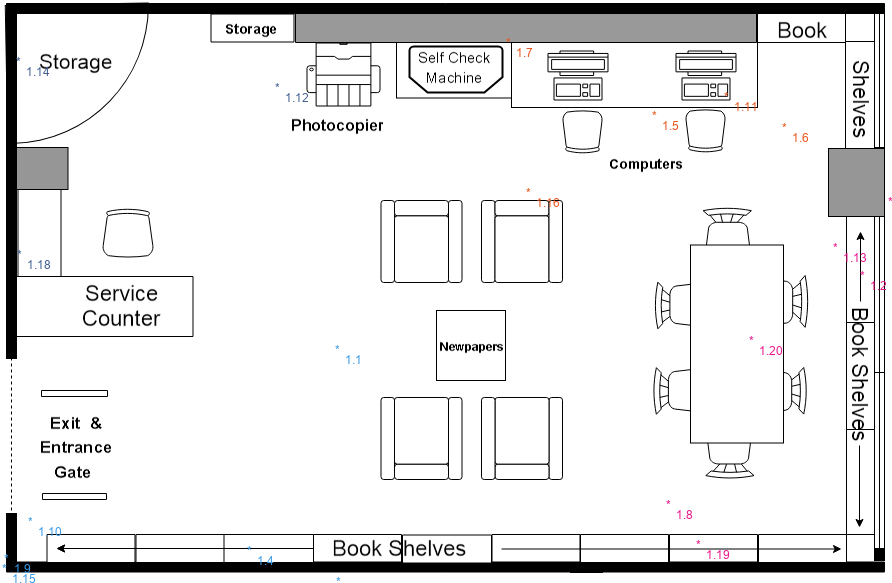

In [10]:
draw = ImageDraw.Draw(floorplan)
font = ImageFont.truetype('arial.ttf', 12)

for i in range(len(pointList)):
    
    draw.text([pointList.iloc[i].x, pointList.iloc[i].y],'*',font=font, fill=colorList[pointList.iloc[i].kmeans])
    draw.text([pointList.iloc[i].x+10, pointList.iloc[i].y+10], str(pointList.iloc[i].label), font=font, fill=colorList[pointList.iloc[i].kmeans])
floorplan

# Code Snippet

In [11]:
#resize
# finalSize = [1600, 1400]#resize bigger
#finalSize = [400, 300]#resize smaller
#imagePanel = Image.new("RGB", finalSize, "white")#white#Paste background panel at the bottom layer
#point = [[100,100],[200,200]]
#pointLabel = [1.1,1.2]

# pointList



# for n in range(20):
#     cor = pointList['coordinate']
#     cor = cor / [w,h]
#     print (cor)

# print(w,h)

# scaleWidth = finalSize[0]/w
# scaleHeight = finalSize[1]/h
# print(scaleWidth)
# print(scaleHeight)
# print(w,h)



#scaleWidth= finalSize[0]/w
#scaleHeight= finalSize[1]/h

# if(scaleWidth>=scaleHeight):
#     w=w*scaleHeight
#     h=h*scaleHeight
#     pointList['scaledCoordinate'] =list(np.array(point)*scaleHeight)
#     fontsize*scaleHeight
# else:
#     w=w*scaleWidth
#     h=h*scaleWidth
#     pointList['scaledCoordinate'] =list(np.array(point)*scaleWidth)
#     fontsize*scaleWidth

# floorplan = floorplan.resize((int(w), int(h)))
# draw = ImageDraw.Draw(floorplan)


# for x in range(len(pointList)):
#     draw.text(pointList[:]['scaledCoordinate'][x],'*',font=font, fill='red')
#     draw.text(pointList[:]['scaledCoordinate'][x]+10,str(pointList[:]['label'][x]),font=font, fill='blue')
# pointList



#center the floor plan
# centerw = int((finalSize[0]-w)/2)
# centerh = int((finalSize[1]-h)/2)


#imagePanel.paste(floorplan, (centerw, centerh) )
#imagePanel
# floorplan.size



#original
# img=Image.open('floorplan.jpg')
# fontsize = 20
# draw = ImageDraw.Draw(img)
# font = ImageFont.truetype('arial.ttf', fontsize)
# for x in range(len(pointList)):
#     draw.text(pointList[:]['coordinate'][x],'*',font=font, fill='red')
#     #draw.text((100,100),'*',font=font, fill='blue')
# img